In [9]:
import numpy as np  # Импорт библиотеки NumPy для работы с массивами и математическими операциями
import matplotlib.pyplot as plt  # Импорт библиотеки Matplotlib для визуализации данных
from numpy import cos, sin, pi, absolute, arange  # Импорт функций и констант из NumPy
from scipy import signal # Импорт библиотеки scipy.signal
from scipy.signal import lfilter, firwin, freqz  # Импорт функций для работы с сигналами из библиотеки SciPy
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show  # Импорт функций для создания графиков из библиотеки PyLab

#Реализация КИХ - фильтра

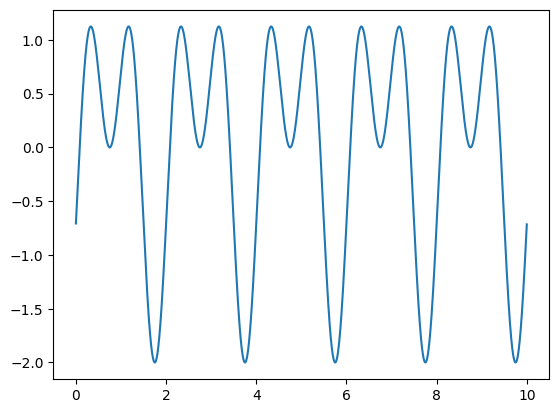

In [10]:
t = np.arange(0, 10, 0.001)  # Создание массива времени от 0 до 10 с шагом 0.001
s = np.sin(2*np.pi*t) + np.sin(2*np.pi*t/2 - np.pi/4)  # Генерация сигнала, состоящего из двух синусоид с разными частотами
plt.plot(t, s)  # Построение графика сигнала
plt.show()  # Отображение графика

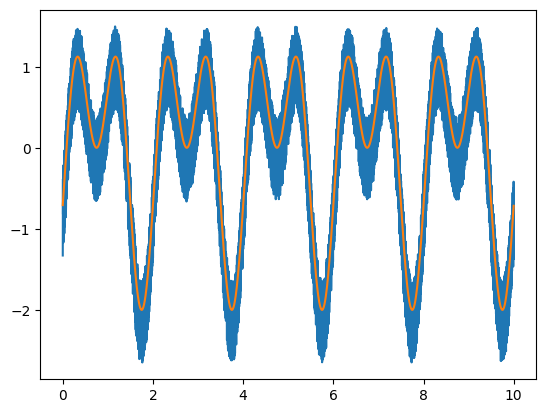

In [11]:
n = np.random.uniform(np.min(s)/3, np.max(s)/3, len(t))  # Генерация случайного шума
sn = s + n  # Добавление шума к оригинальному сигналу
plt.plot(t, sn)  # Построение графика сигнала с шумом
plt.plot(t, s)  # Построение графика оригинального сигнала
plt.show()  # Отображение графиков

In [12]:
# Функция для применения КИХ-фильтра
def KIH(func, time):
    FS = len(time)                                       # Частота дискретизации
    FC = 0.05 / (0.5 * FS)                               # Граничная частота на уровне 0.05 Гц
    N = 60                                               # Количество коэффициентов фильтра
    a = 1                                                # Знаменатель фильтра
    b = signal.firwin(N, cutoff=FC, window='hamming')    # Числитель фильтра
    y = signal.lfilter(b, a, func)                       # Применение фильтра к сигналу
    return y

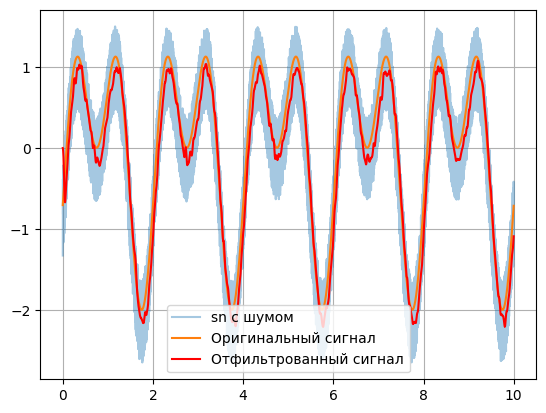

In [13]:
sn_new = KIH(sn, t)  # Применение КИХ-фильтра к сигналу с шумом
plt.plot(t, sn, alpha=0.4, label='sn с шумом')  # Построение графика сигнала с шумом (полупрозрачность для наглядности)
plt.plot(t, s, label='Оригинальный сигнал')  # Построение графика оригинального сигнала
plt.plot(t, sn_new, 'r', label='Отфильтрованный сигнал')  # Построение графика отфильтрованного сигнала
plt.grid()  # Включение сетки на графике
plt.legend()  # Отображение легенды
plt.show()  # Отображение графиков


#Реализация других фильтров (примеры)

In [14]:
# Функция для медианной фильтрации

def median(f):
    # Создание буфера
    if not hasattr(median, "buffer"):
        median.buffer = [f] * 3

    # Перемещение буфера к фактическим значениям ( [0, 1, 2] -> [1, 2, 3] )
    median.buffer = median.buffer[1:]
    median.buffer.append(f)

    # Вычисление медианы
    a = median.buffer[0]
    b = median.buffer[1]
    c = median.buffer[2]
    middle = max(a, c) if (max(a, b) == max(b, c)) else max(b, min(a, c))

    return middle

In [15]:
# Функция для вычисления среднего арифметического

def arith_mean(f, buffer_size=10):
    # Создание буфера
    if not hasattr(arith_mean, "buffer"):
        arith_mean.buffer = [f] * buffer_size

    # Перемещение буфера к фактическим значениям ( [0, 1, 2, 3] -> [1, 2, 3, 4] )
    arith_mean.buffer = arith_mean.buffer[1:]
    arith_mean.buffer.append(f)

    # Вычисление среднего арифметического
    mean = sum(arith_mean.buffer) / len(arith_mean.buffer)

    return mean

In [16]:
# Функция для фильтрации с использованием экспоненциального бегущего среднего

def easy_mean(f, s_k=0.2, max_k=0.9, d=1.5):
    # Создание статической переменной
    if not hasattr(easy_mean, "fit"):
        easy_mean.fit = f

    # Адаптивное соотношение
    k = s_k if (abs(f - easy_mean.fit) < d) else max_k

    # Вычисление экспоненциального бегущего среднего
    easy_mean.fit += (f - easy_mean.fit) * k

    return easy_mean.fit

In [17]:
# Функция для фильтрации с использованием фильтра Калмана

def kalman(f, q=0.25, r=0.7):
    if not hasattr(kalman, "Accumulated_Error"):
        kalman.Accumulated_Error = 1
        kalman.kalman_adc_old = 0

    if abs(f - kalman.kalman_adc_old) / 50 > 0.25:
        Old_Input = f * 0.382 + kalman.kalman_adc_old * 0.618
    else:
        Old_Input = kalman.kalman_adc_old

    Old_Error_All = (kalman.Accumulated_Error**2 + q**2)**0.5
    H = Old_Error_All**2 / (Old_Error_All**2 + r**2)
    kalman_adc = Old_Input + H * (f - Old_Input)
    kalman.Accumulated_Error = ((1 - H) * Old_Error_All**2)**0.5
    kalman.kalman_adc_old = kalman_adc

    return kalman_adc


In [18]:
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show

In [19]:
# Функция для нормализации сигнала с использованием фильтра Калмана

def normalise(func):
    o = []  # Создание списка для хранения отфильтрованных значений
    for p in func:
        res = kalman(p)  # Применение фильтра Калмана к значению сигнала
        # res = easy_mean(res)  # другие фильтры (например, экспоненциальное бегущее среднее)
        o.append(res)  # Добавление отфильтрованного значения в список
    return o


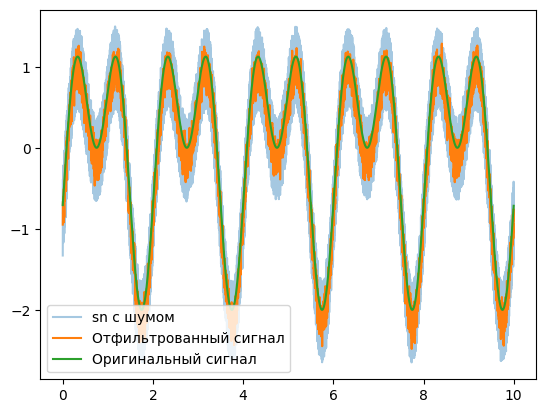

In [21]:
plt.plot(t, sn, alpha=0.4, label='sn с шумом')  # Построение графика сигнала с шумом (полупрозрачность для наглядности)
plt.plot(t, normalise(sn), label='Отфильтрованный сигнал')  # Построение графика отфильтрованного сигнала
plt.plot(t, s, label='Оригинальный сигнал')  # Построение графика оригинального сигнала
plt.legend()  # Отображение легенды
plt.show()  # Отображение графиков